#  تمرین ۴:فیلتر های لبه یاب و تیز کننده (قسمت الف)
تصویر کاغذ را در ورودی خوانده فیلترهای تیزکننده به آن اعمال کنید. ازسوی دیگر به تصویر اصلی فیلتر محو کننده اعمال
کنید تصویر حاصل شده را از تصویر اصلی کم کرده و حاصل را به تصویر اصلی اضافه کنید. خروجی دو فرآیند گفته شده را با هم
مقایسه کنید و گزارش دهید

### Importing libraries and setting figs size

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

fig_w = 30
fig_h = 20

### Reading the image

In [2]:
paper = cv2.imread("paper.png", cv2.IMREAD_GRAYSCALE)

### Using sharping filter and showing the result

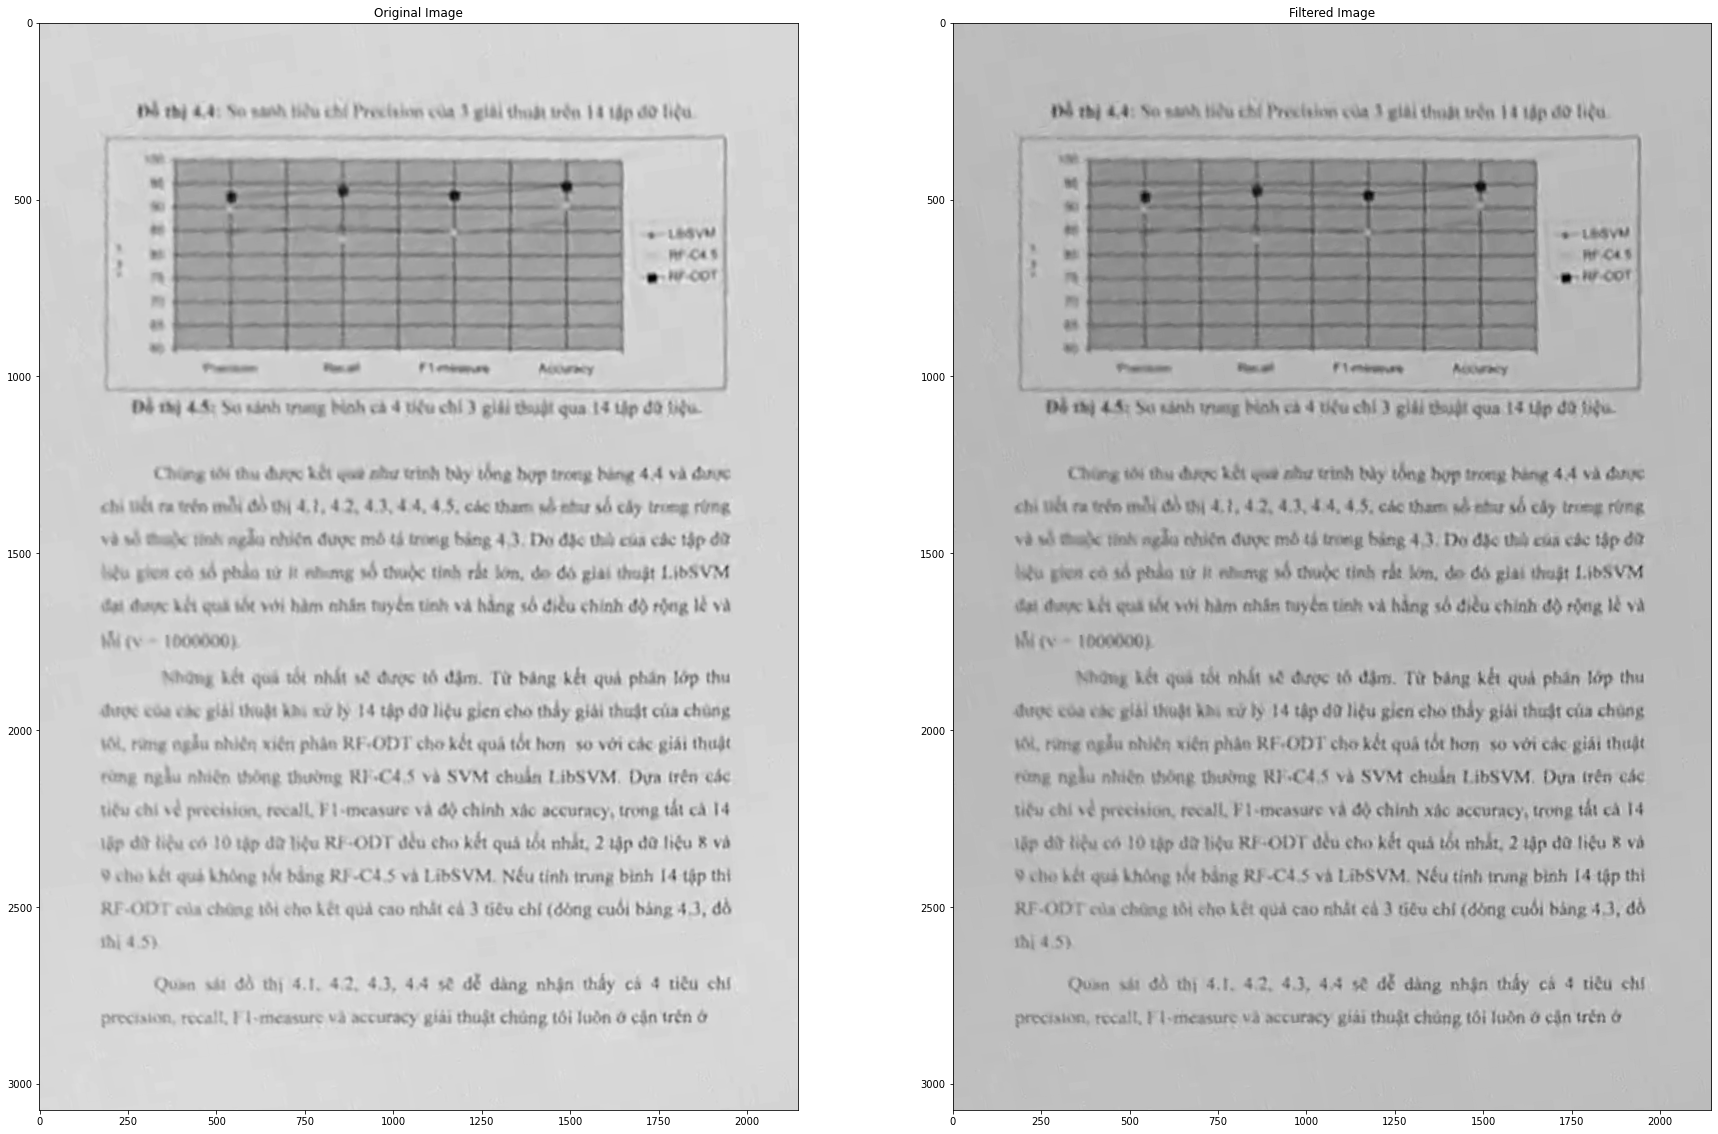

In [3]:
gate = np.array([[0, -1, 0],
                 [-1, 5, -1],
                 [0, -1, 0]])
ddepth = cv2.CV_8U
border = cv2.BORDER_REPLICATE
sharped_paper = cv2.filter2D(paper, ddepth, gate, borderType=border)

_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(paper, cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(sharped_paper, cmap='gray')
subplt[1].set_title("Filtered Image")
plt.show()

همانگونه که مشاهده می شود با اعمال فیلتر لاپلایسن نوشته های تصویر سمت راست اندکی واضح تر شده اند

### Calculating the desired picture with showing steps

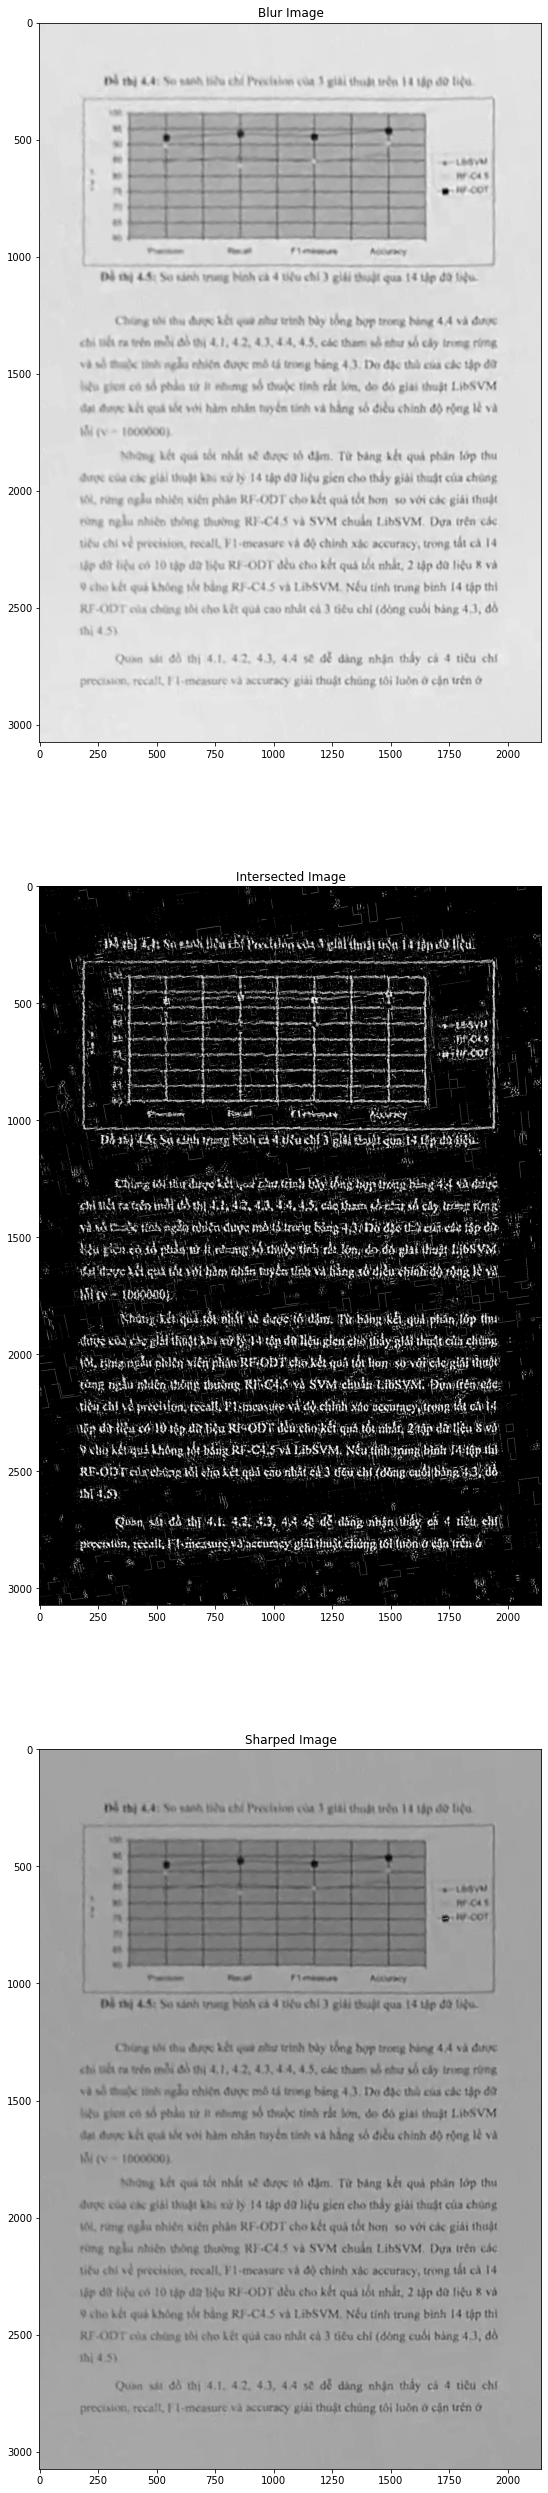

In [4]:
size = 5
blur_kernel = np.ones((size, size), dtype=np.uint8) / (size ** 2)
blur_paper = cv2.filter2D(paper, -1, blur_kernel)

intersect_paper = paper - blur_paper

blur_sharped_paper = paper + intersect_paper

_, subplt = plt.subplots(3, 1, figsize=(10, 45))
subplt[0].imshow(blur_paper, cmap='gray')
subplt[0].set_title("Blur Image")
subplt[1].imshow(intersect_paper, cmap='gray')
subplt[1].set_title("Intersected Image")
subplt[2].imshow(blur_sharped_paper, cmap='gray')
subplt[2].set_title("Sharped Image")
plt.show()

با محو کردن تصویر عملا لبه ها را کمرنگ تر می کنیم و اگر تصویر محو شده را از تصویر اصلی کم کنیم حاصل باقی مانده چیزی نیست جز لبه ها چون در تصویر اصلی همچنان لبه ها وجود دارند اما در تصویر محو شده روی لبه ها تا حدی تخریب صورت گرفته پس در عمل کم کردن این اختلاف یعنی وجود لبه در تصویر اصلی و کمرنگ بودن ان در تصویر محو شده ایجاد می شود (تصویر دوم) با اضافه کردن این تصویر، به تصویر اصلی عملا به تقویت لبه ها پرداختیم.

### Comparing with the main image

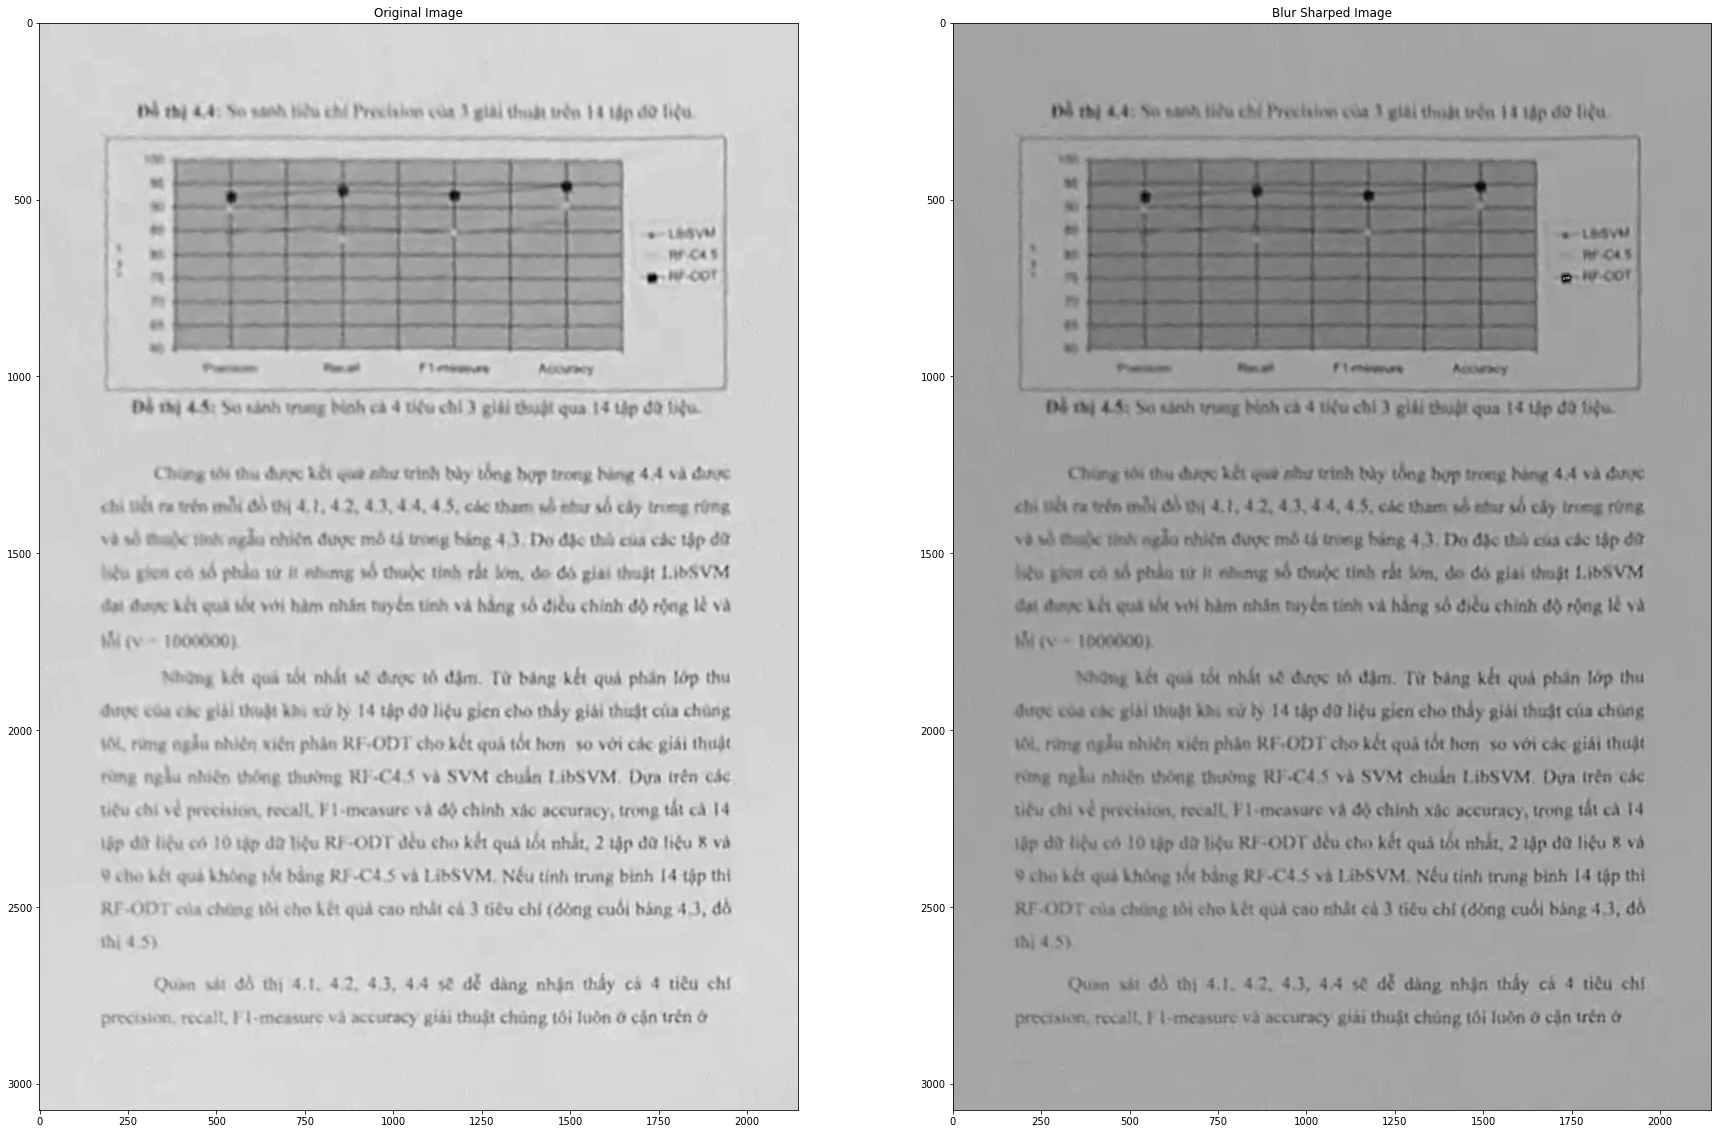

In [5]:
_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(paper, cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(blur_sharped_paper, cmap='gray')
subplt[1].set_title("Blur Sharped Image")
plt.show()

با دقت کافی در دو تصویر مشاهده می شود در تصویر به دست آمده از فرآیند ها کمی لبه ها تقویت شده اند و میزان خوانایی نوشته تا حدی افزایش یافته. اندازه دریچه در خروجی تاثیر زیادی دارد. به علت بالا بودن ابعاد تصویر دریچه ۵ در ۵ انتخاب شده هر چقدر اندازه دریچه بزرگ تر باشد مقادیر بیشتری به تصویر اصلی افزوده خواهد شد ولی این لزما به معنای تیز تر شدن لبه ها نیست، با آزمون و خطا دریچه های مطلوب ۵ در ۵ و ۷ در ۷ به دست آمد

### Comparing two methods

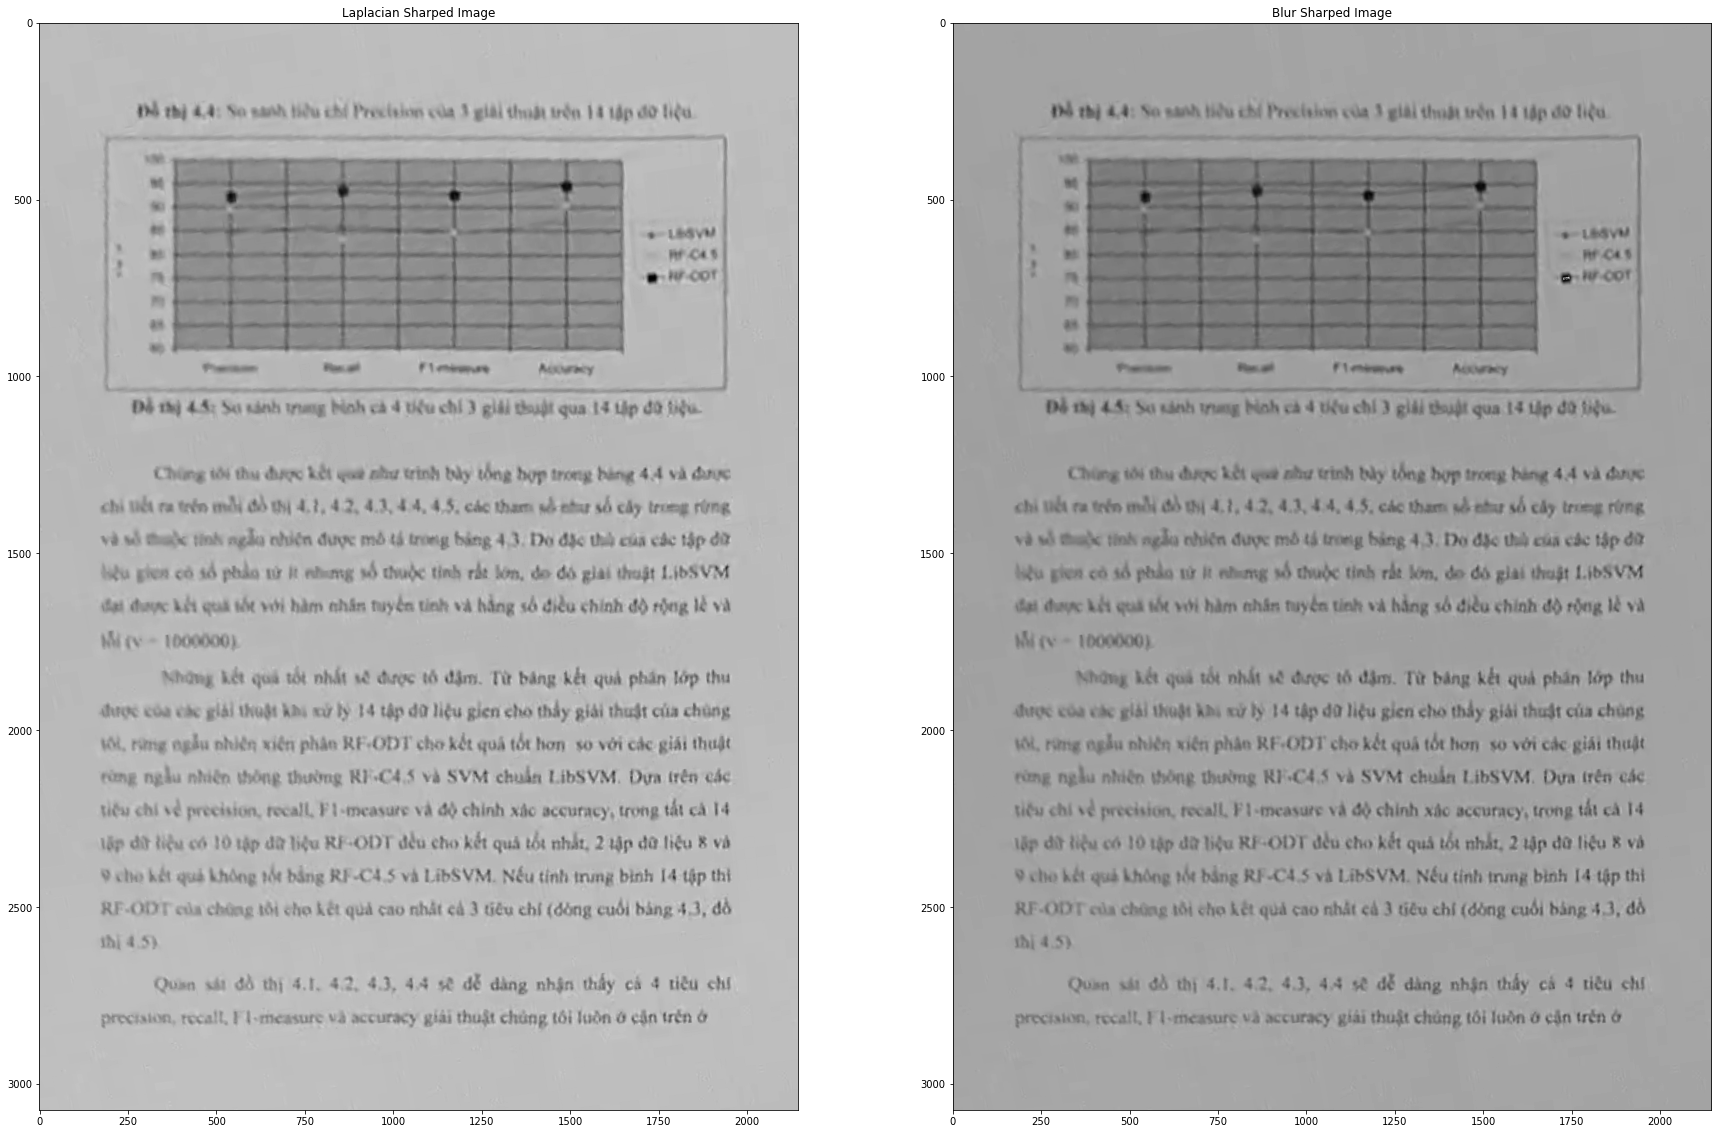

In [6]:
_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(sharped_paper, cmap='gray')
subplt[0].set_title("Laplacian Sharped Image")
subplt[1].imshow(blur_sharped_paper, cmap='gray')
subplt[1].set_title("Blur Sharped Image")
plt.show()

قضاوت در مورد این دو تصویر و انتخاب برنده این رقابت به علت نزدیک بودن تصاویر امری سخت به نظر می رسد. به شخصه مستقل از تیره تر بودن تصویر حاصل از عملیات محو کردن به نظر میرسد این تصویر در جزئیات کمی کیفیت بهتری برای به رخ کشیدن دارد. اندازه دریچه محو کننده نیز در این امر بسیار موثر است